<a href="https://colab.research.google.com/github/AkibReza/CSE413_Simulation_and_Modeling/blob/main/One_Sample_t_Test_AkibReza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== ONE-SAMPLE T-TEST ANALYSIS ===
Student ID: 61
Dataset generation rule applied

k = 61
k % 5 = 1

Generated exam scores (n=12):
Formula: 60 + randint(0,15) + 1
Scores: [67 64 73 75 71 68 73 65 67 70 63 67]
Raw random components: [ 6  3 12 14 10  7 12  4  6  9  2  6]

=== DESCRIPTIVE STATISTICS ===
Sample size (n): 12
Sample mean: 68.583
Sample standard deviation: 3.825
Standard error: 1.104

=== HYPOTHESIS TESTING ===
H₀: μ = 65 (The population mean is equal to 65)
H₁: μ ≠ 65 (The population mean is different from 65)
Significance level: α = 0.05
Test type: Two-tailed test

=== TEST RESULTS ===
Hypothesized mean (μ₀): 65
Sample mean (x̄): 68.583
t-statistic: 3.2454
Degrees of freedom (df): 11
p-value: 0.007798

=== CONFIDENCE INTERVAL ===
95% Confidence Interval for the sample mean:
CI = [66.153, 71.013]

=== DECISION ===
Decision: REJECT H₀
Since p-value (0.007798) < α (0.05), we reject H₀.
There is sufficient evidence to conclude that the population mean is significantly different

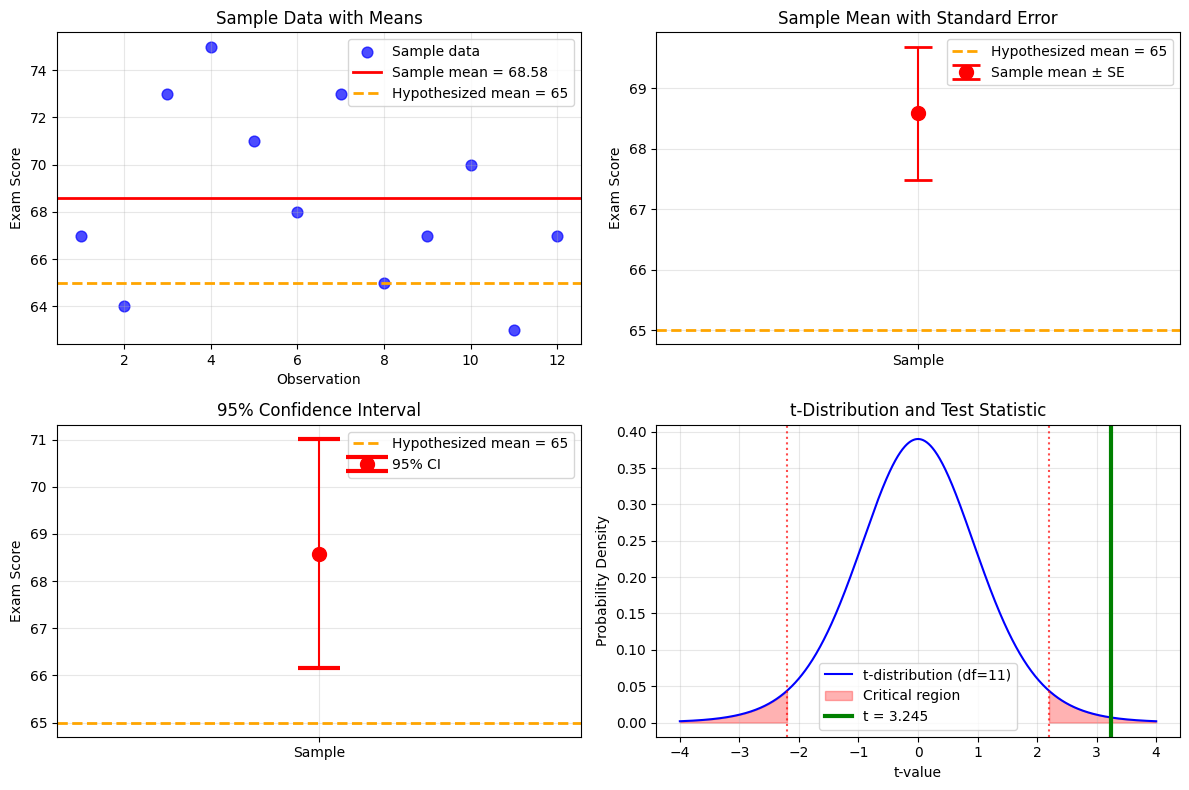


=== SUMMARY TABLE ===
         Statistic     Value
       Sample Size        12
       Sample Mean    68.583
    Sample Std Dev     3.825
    Standard Error     1.104
 Hypothesized Mean        65
       t-statistic    3.2454
           p-value  0.007798
Degrees of Freedom        11
  Critical t-value   ±2.2010
      95% CI Lower    66.153
      95% CI Upper    71.013
          Decision REJECT H₀

=== FINAL CONCLUSION ===
Based on the one-sample t-test analysis:
• Sample mean: 68.583
• Hypothesized mean: 65
• Test statistic: t = 3.2454
• p-value: 0.007798
• Decision: REJECT H₀ at α = 0.05
• There is sufficient evidence to conclude that the population mean is significantly different from 65.


In [1]:
# One-Sample t-Test Analysis
# Student ID: 61

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

print("=== ONE-SAMPLE T-TEST ANALYSIS ===")
print("Student ID: 61")
print("Dataset generation rule applied\n")

# Step 1: Generate dataset based on ID rule
# Last two digits of ID: 61
# k = 61
# Dataset formula: exam_scores = 60 + randint(0, 15, size=12) + (k % 5)

k = 61
print(f"k = {k}")
print(f"k % 5 = {k % 5}")

# Generate the dataset
base_scores = 60
random_component = np.random.randint(0, 15, size=12)
adjustment = k % 5
exam_scores = base_scores + random_component + adjustment

print(f"\nGenerated exam scores (n=12):")
print(f"Formula: 60 + randint(0,15) + {adjustment}")
print(f"Scores: {exam_scores}")
print(f"Raw random components: {random_component}")

# Step 2: Calculate descriptive statistics
sample_mean = np.mean(exam_scores)
sample_std = np.std(exam_scores, ddof=1)  # Sample standard deviation
sample_se = sample_std / np.sqrt(len(exam_scores))  # Standard error
n = len(exam_scores)

print(f"\n=== DESCRIPTIVE STATISTICS ===")
print(f"Sample size (n): {n}")
print(f"Sample mean: {sample_mean:.3f}")
print(f"Sample standard deviation: {sample_std:.3f}")
print(f"Standard error: {sample_se:.3f}")

# Step 3: State the hypotheses
print(f"\n=== HYPOTHESIS TESTING ===")
print("H₀: μ = 65 (The population mean is equal to 65)")
print("H₁: μ ≠ 65 (The population mean is different from 65)")
print("Significance level: α = 0.05")
print("Test type: Two-tailed test")

hypothesized_mean = 65
alpha = 0.05

# Step 4: Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(exam_scores, hypothesized_mean)
degrees_of_freedom = n - 1

print(f"\n=== TEST RESULTS ===")
print(f"Hypothesized mean (μ₀): {hypothesized_mean}")
print(f"Sample mean (x̄): {sample_mean:.3f}")
print(f"t-statistic: {t_statistic:.4f}")
print(f"Degrees of freedom (df): {degrees_of_freedom}")
print(f"p-value: {p_value:.6f}")

# Step 5: Calculate 95% confidence interval
confidence_level = 0.95
confidence_interval = stats.t.interval(
    confidence_level,
    degrees_of_freedom,
    loc=sample_mean,
    scale=sample_se
)

print(f"\n=== CONFIDENCE INTERVAL ===")
print(f"95% Confidence Interval for the sample mean:")
print(f"CI = [{confidence_interval[0]:.3f}, {confidence_interval[1]:.3f}]")

# Step 6: Make decision
print(f"\n=== DECISION ===")
if p_value < alpha:
    decision = "REJECT"
    conclusion = f"Since p-value ({p_value:.6f}) < α ({alpha}), we reject H₀."
    interpretation = "There is sufficient evidence to conclude that the population mean is significantly different from 65."
else:
    decision = "FAIL TO REJECT"
    conclusion = f"Since p-value ({p_value:.6f}) ≥ α ({alpha}), we fail to reject H₀."
    interpretation = "There is insufficient evidence to conclude that the population mean is significantly different from 65."

print(f"Decision: {decision} H₀")
print(conclusion)
print(interpretation)

# Step 7: Additional interpretation
print(f"\n=== ADDITIONAL INTERPRETATION ===")
critical_value = stats.t.ppf(1 - alpha/2, degrees_of_freedom)
print(f"Critical t-value (two-tailed, α=0.05): ±{critical_value:.4f}")

if abs(t_statistic) > critical_value:
    print(f"Since |t| = {abs(t_statistic):.4f} > {critical_value:.4f}, the result is statistically significant.")
else:
    print(f"Since |t| = {abs(t_statistic):.4f} ≤ {critical_value:.4f}, the result is not statistically significant.")

# Check if hypothesized mean falls within confidence interval
if confidence_interval[0] <= hypothesized_mean <= confidence_interval[1]:
    print(f"The hypothesized mean ({hypothesized_mean}) falls within the 95% CI, supporting our decision.")
else:
    print(f"The hypothesized mean ({hypothesized_mean}) falls outside the 95% CI, supporting our decision.")

# Step 8: Create visualization
plt.figure(figsize=(12, 8))

# Create subplot layout
plt.subplot(2, 2, 1)
# Plot 1: Sample data with mean and hypothesized mean
plt.scatter(range(1, n+1), exam_scores, color='blue', alpha=0.7, s=60, label='Sample data')
plt.axhline(y=sample_mean, color='red', linestyle='-', linewidth=2, label=f'Sample mean = {sample_mean:.2f}')
plt.axhline(y=hypothesized_mean, color='orange', linestyle='--', linewidth=2, label=f'Hypothesized mean = {hypothesized_mean}')
plt.xlabel('Observation')
plt.ylabel('Exam Score')
plt.title('Sample Data with Means')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Sample mean with error bars
plt.subplot(2, 2, 2)
plt.errorbar(1, sample_mean, yerr=sample_se, fmt='ro', markersize=10, capsize=10, capthick=2, label='Sample mean ± SE')
plt.axhline(y=hypothesized_mean, color='orange', linestyle='--', linewidth=2, label=f'Hypothesized mean = {hypothesized_mean}')
plt.xlim(0.5, 1.5)
plt.ylabel('Exam Score')
plt.title('Sample Mean with Standard Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks([1], ['Sample'])

# Plot 3: Confidence interval visualization
plt.subplot(2, 2, 3)
plt.errorbar(1, sample_mean,
             yerr=[[sample_mean - confidence_interval[0]], [confidence_interval[1] - sample_mean]],
             fmt='ro', markersize=10, capsize=15, capthick=3, label='95% CI')
plt.axhline(y=hypothesized_mean, color='orange', linestyle='--', linewidth=2, label=f'Hypothesized mean = {hypothesized_mean}')
plt.xlim(0.5, 1.5)
plt.ylabel('Exam Score')
plt.title('95% Confidence Interval')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks([1], ['Sample'])

# Plot 4: t-distribution with test statistic
plt.subplot(2, 2, 4)
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, degrees_of_freedom)
plt.plot(x, y, 'b-', label=f't-distribution (df={degrees_of_freedom})')

# Shade critical regions
x_critical = np.linspace(-4, -critical_value, 100)
y_critical = stats.t.pdf(x_critical, degrees_of_freedom)
plt.fill_between(x_critical, 0, y_critical, alpha=0.3, color='red', label='Critical region')

x_critical2 = np.linspace(critical_value, 4, 100)
y_critical2 = stats.t.pdf(x_critical2, degrees_of_freedom)
plt.fill_between(x_critical2, 0, y_critical2, alpha=0.3, color='red')

# Mark test statistic
plt.axvline(x=t_statistic, color='green', linestyle='-', linewidth=3, label=f't = {t_statistic:.3f}')
plt.axvline(x=-critical_value, color='red', linestyle=':', alpha=0.7)
plt.axvline(x=critical_value, color='red', linestyle=':', alpha=0.7)

plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('t-Distribution and Test Statistic')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print(f"\n=== SUMMARY TABLE ===")
summary_data = {
    'Statistic': ['Sample Size', 'Sample Mean', 'Sample Std Dev', 'Standard Error',
                  'Hypothesized Mean', 't-statistic', 'p-value', 'Degrees of Freedom',
                  'Critical t-value', '95% CI Lower', '95% CI Upper', 'Decision'],
    'Value': [n, f'{sample_mean:.3f}', f'{sample_std:.3f}', f'{sample_se:.3f}',
              hypothesized_mean, f'{t_statistic:.4f}', f'{p_value:.6f}', degrees_of_freedom,
              f'±{critical_value:.4f}', f'{confidence_interval[0]:.3f}',
              f'{confidence_interval[1]:.3f}', f'{decision} H₀']
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print(f"\n=== FINAL CONCLUSION ===")
print(f"Based on the one-sample t-test analysis:")
print(f"• Sample mean: {sample_mean:.3f}")
print(f"• Hypothesized mean: {hypothesized_mean}")
print(f"• Test statistic: t = {t_statistic:.4f}")
print(f"• p-value: {p_value:.6f}")
print(f"• Decision: {decision} H₀ at α = {alpha}")
print(f"• {interpretation}")